<a href="https://colab.research.google.com/github/nipunikajain/DeepLearning1/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
import torchvision
import random
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import PIL

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## Settings

RANDOM_SEED=1
BATCH_SIZE=128
EPOCHS = 100


## MNIST Dataset

training_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32,32)),
    torchvision.transforms.RandomCrop(size=(28,28)),
    torchvision.transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,))
])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.CenterCrop(size=(28, 28)),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=training_transforms,
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=test_transforms)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 128314155.96it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46716426.47it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39010900.19it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14553497.91it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


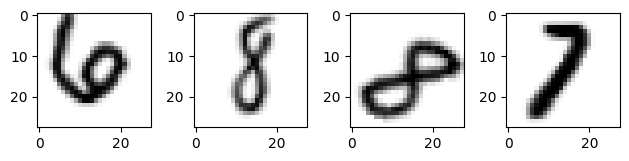

In [8]:
# Checking the dataset

random.seed(0)
torch.manual_seed(0)


for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


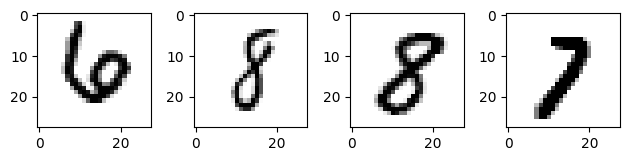

In [9]:
# compare without augmentation

train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=torchvision.transforms.ToTensor(),
                               download=True)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

torch.manual_seed(0)
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()